# Support Vector Machine (SVM)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (20., 14.)
np.set_printoptions(suppress = True)

import warnings
warnings.filterwarnings('ignore')

## SVM without Gaussian Kernel

#### Import data

In [39]:
data1 = loadmat('data/ex6data1.mat')

#### Visualize data

In [40]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes = None):
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
        
    axes.scatter(X[pos][:, 0], X[pos][:, 1], marker = '+', c = 'k', s = 50, linewidth = 2, label = pos_label)
    axes.scatter(X[neg][:, 0], X[neg][:, 1], marker = 'o', c = 'y', s = 50, linewidth = 2, label = neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize = 12)
    axes.set_ylabel(ylabel, fontsize = 12)
    
    axes.legend(bbox_to_anchor = (1, 1), fancybox = True)

No handles with labels found to put in legend.


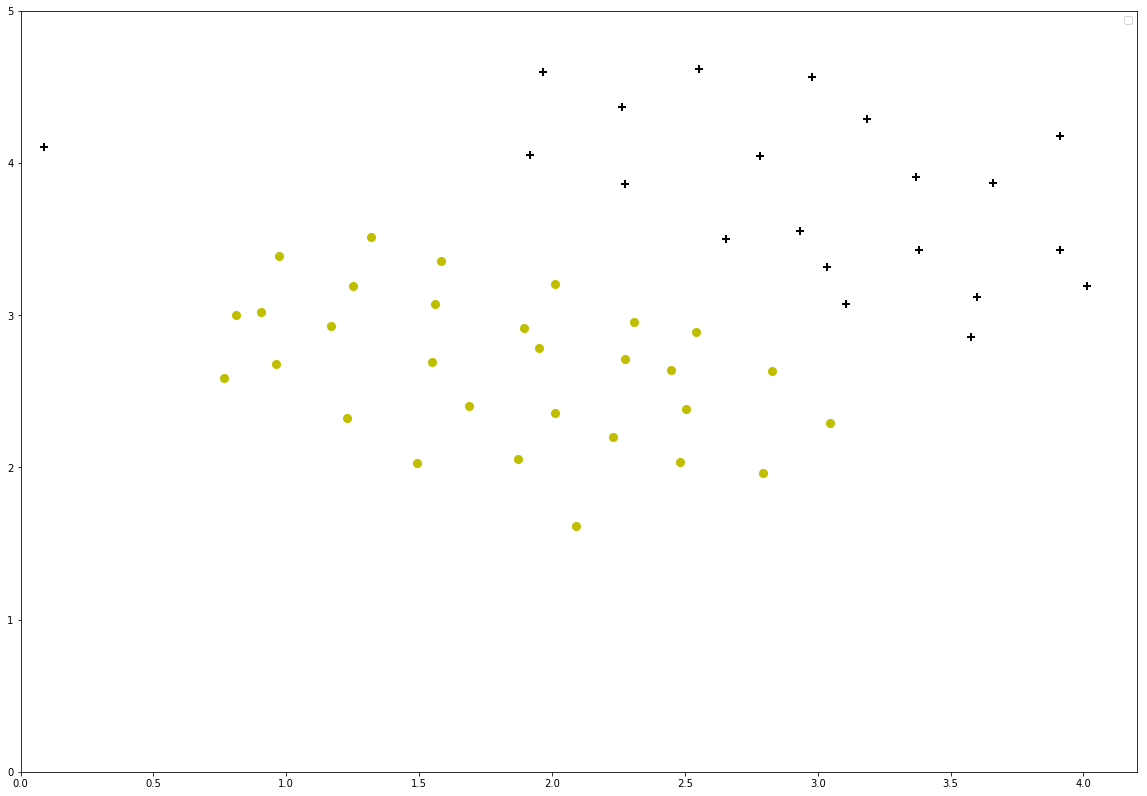

In [41]:
plot_data(data1['X'], data1['y'], '', '', '', '', 0, 4.2, 0, 5)

#### SVM with small regularization parameter

No handles with labels found to put in legend.


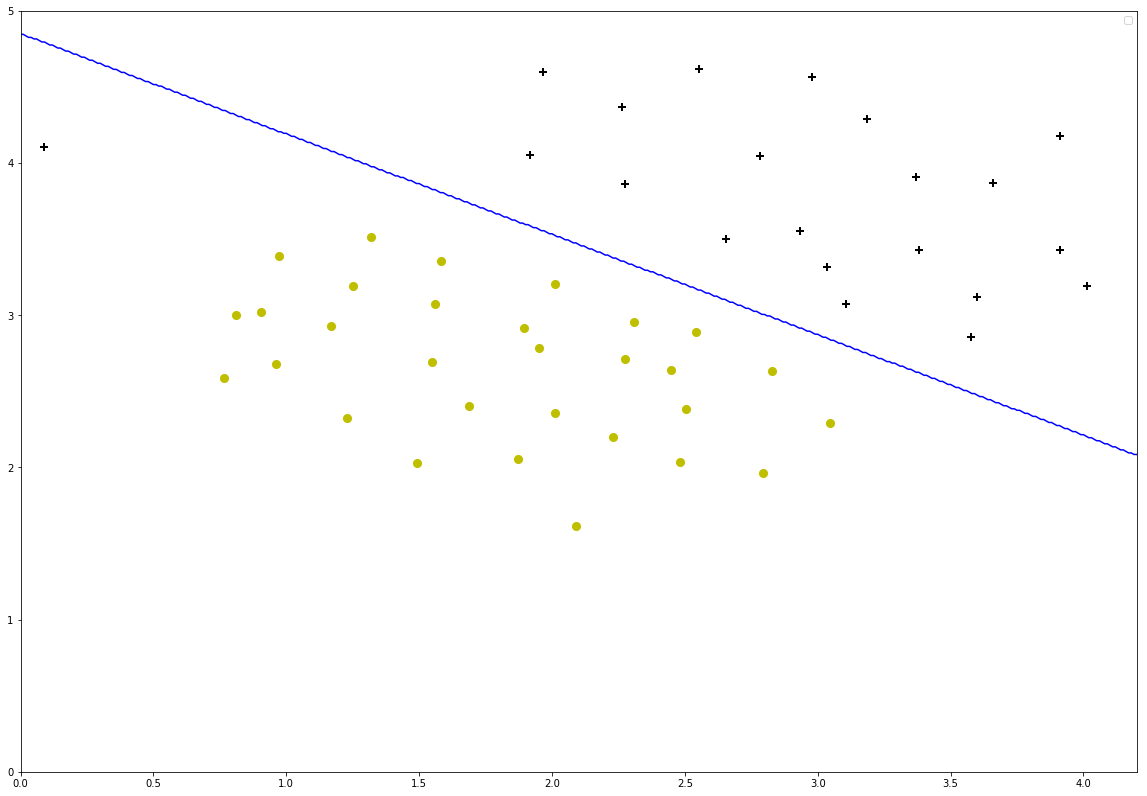

In [42]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', C = 1.0, decision_function_shape = 'ovr')
clf.fit(data1['X'], data1['y'].ravel())

plot_data(data1['X'], data1['y'], '', '', '', '', 0, 4.2, 0, 5)

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], linewdith = 0.5, colors = 'b')

**Observation**: A low regularization parameter is better for generelization, because it did not consider the outlier as seen above. Therefore, this model will have a larger training error than its cross-validation error.

#### SVM with large regularization parameter

No handles with labels found to put in legend.


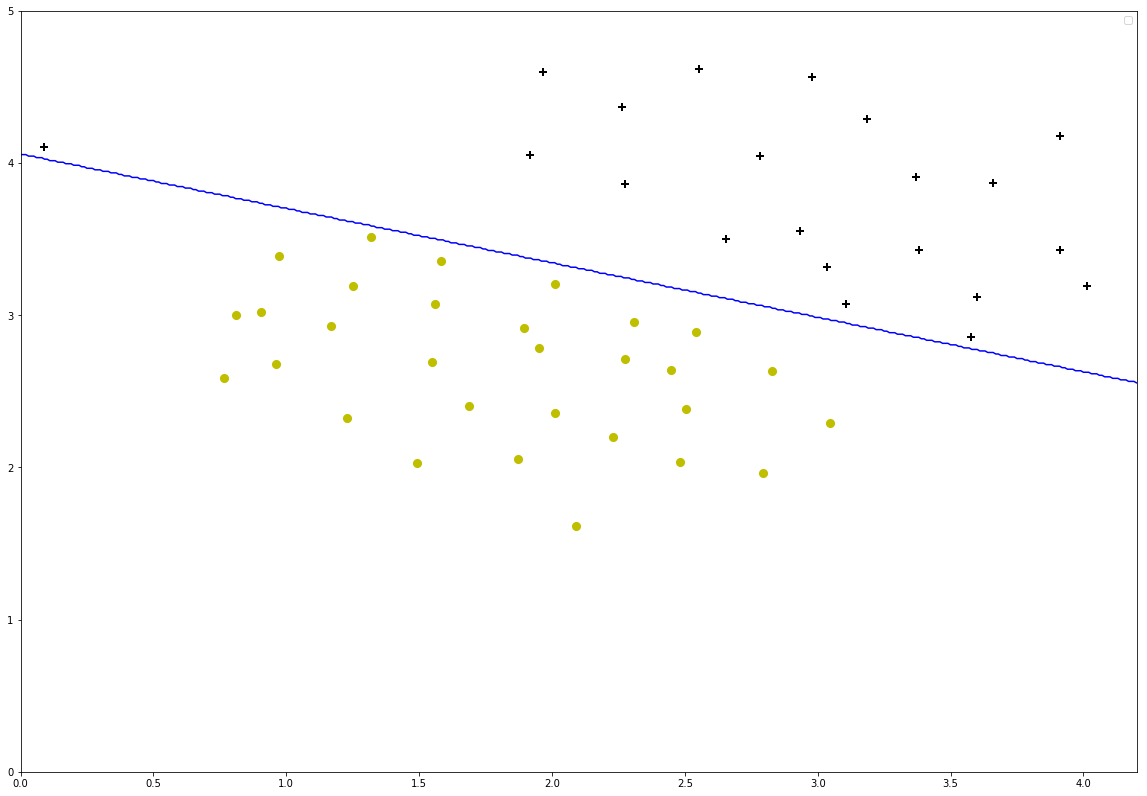

In [43]:
clf100 = svm.SVC(kernel = 'linear', C = 100.0, decision_function_shape = 'ovr')
clf100.fit(data1['X'], data1['y'].ravel())

plot_data(data1['X'], data1['y'], '', '', '', '', 0, 4.2, 0, 5)

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf100.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], linewdith = 0.5, colors = 'b')

**Obervation**: Here, using a larger regularization parameter, the model is overfits the training set. Therefore, its training error is very small, but its cross-validation error will be higher, and so this models generalizes poorly.

## SVM with Gaussian Kernels

#### Import data

In [44]:
data2 = loadmat('data/ex6data2.mat')

#### Visualize data

No handles with labels found to put in legend.


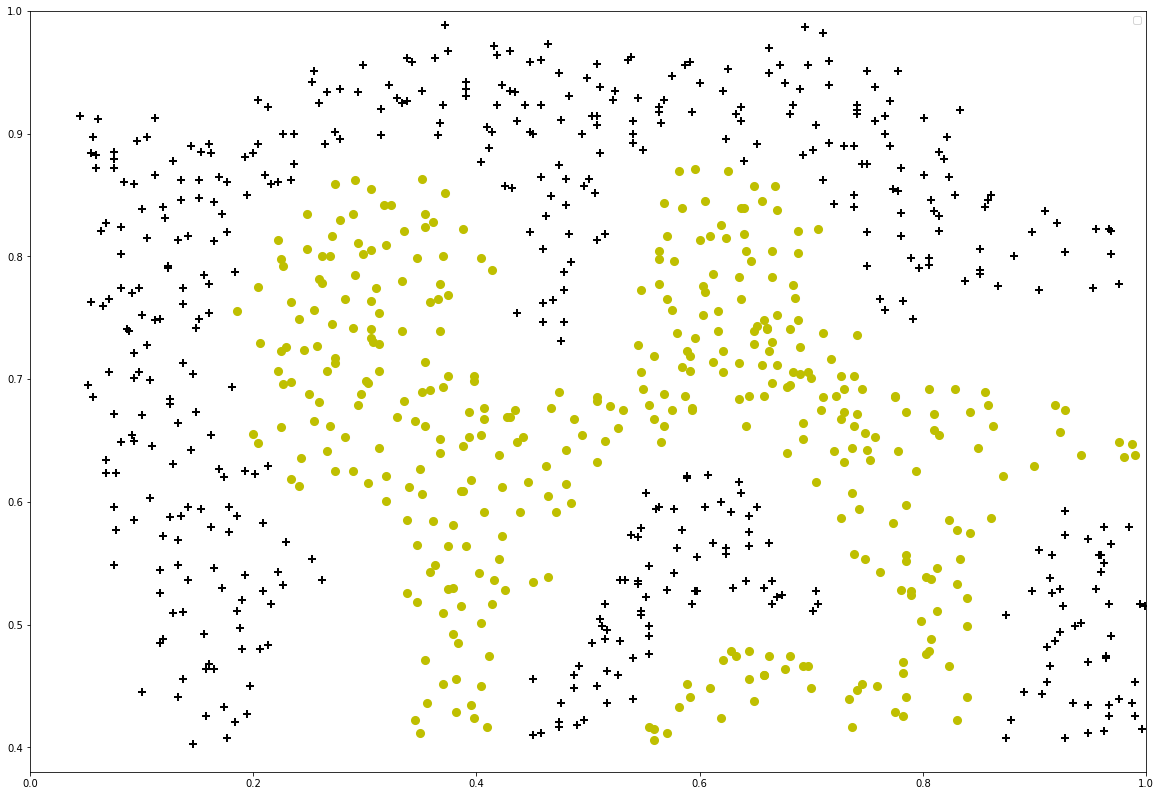

In [45]:
plot_data(data2['X'], data2['y'], '', '', '', '', 0, 1, 0.38, 1)

#### Define and test a Gaussian Kernel

In [46]:
def gaussian_kernel(x1, x2, sigma):
    x1 = np.array(x1)
    x2 = np.array(x2)
    
    return np.exp(np.dot(x1 - x2, x1 - x2) / (-2 * np.square(sigma)))

In [47]:
x1 = [1, 2, 1]
x2 = [0, 4, -1]
sigma = 2

gauss_test = gaussian_kernel(x1, x2, sigma)

# Expecting 0.324652
print(gauss_test)

0.32465246735834974


#### Train and fit SVM

No handles with labels found to put in legend.


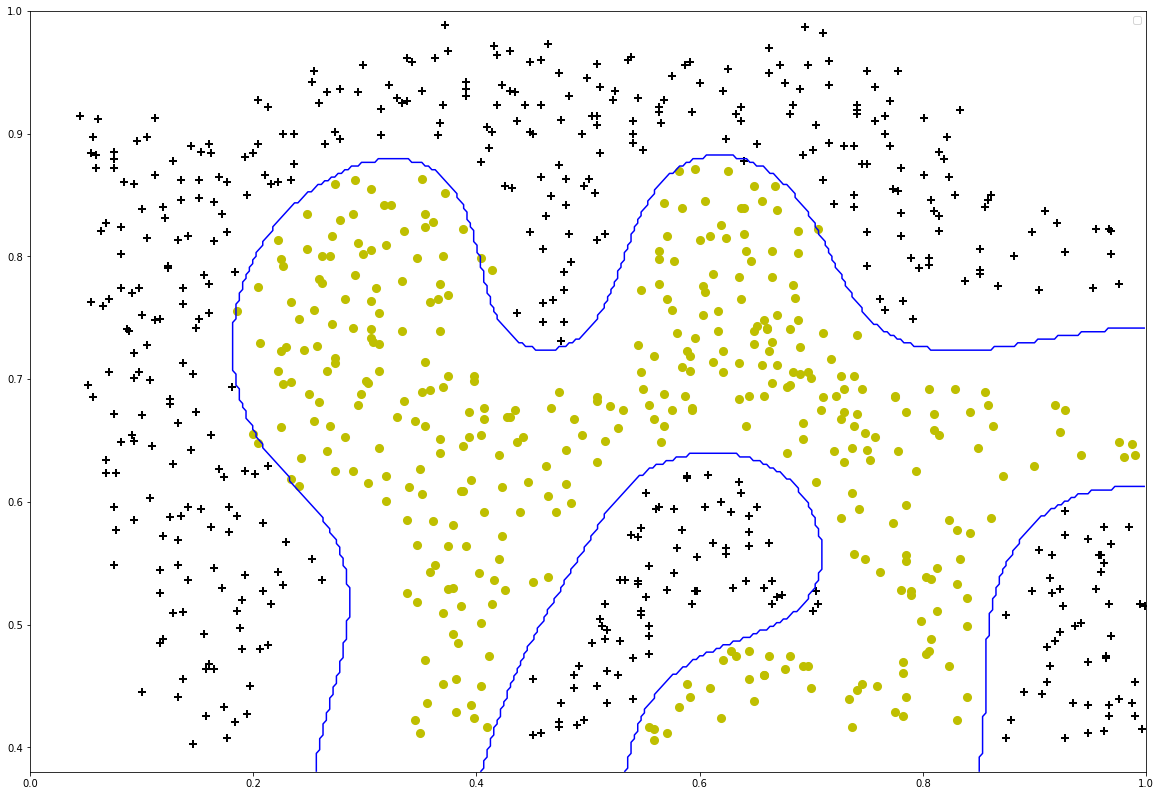

In [48]:
sigma = 0.1

clfg = svm.SVC(kernel = 'rbf', gamma = 1/(2 * sigma**2), C = 1.0, decision_function_shape = 'ovr')
clfg.fit(data2['X'], data2['y'].ravel())

plot_data(data2['X'], data2['y'], '', '', '', '', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], linewdith = 0.5, colors = 'b')

## SVM with cross validation

#### Import data

In [49]:
data3 = loadmat('data/ex6data3.mat')

#### Visualize data

No handles with labels found to put in legend.


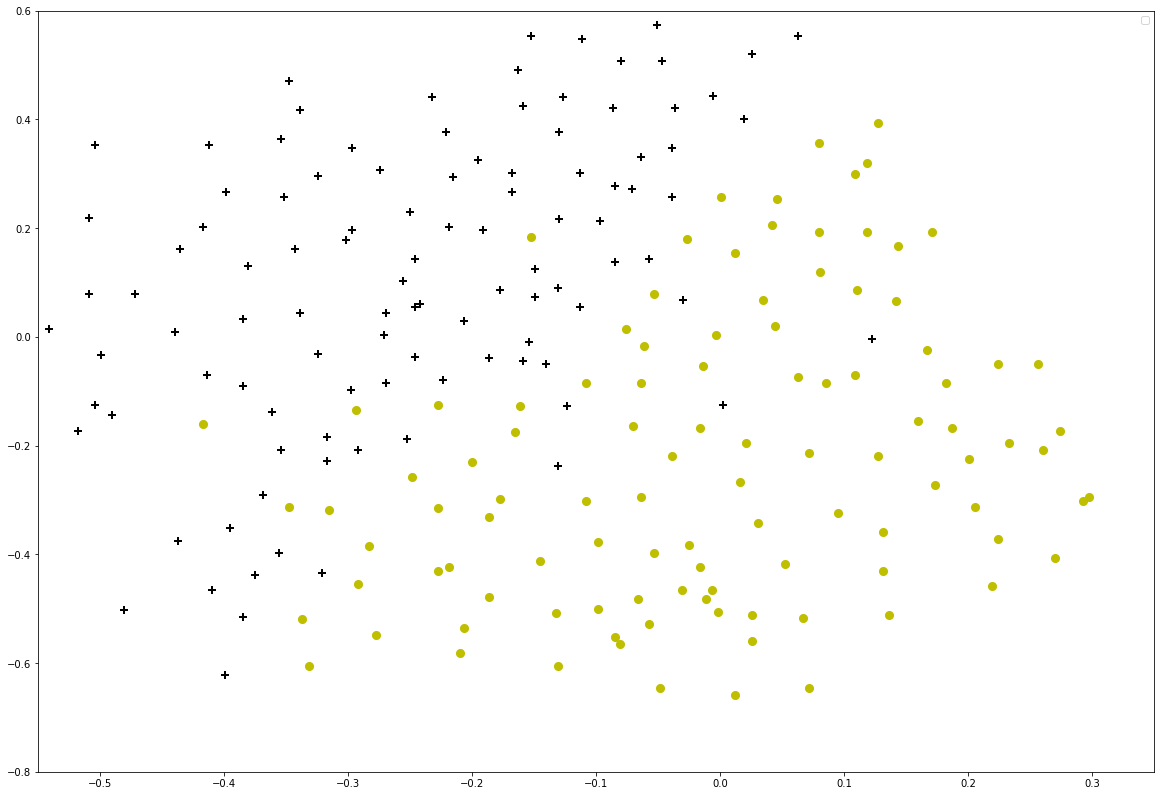

In [50]:
plot_data(data3['X'], data3['y'], '', '', '', '', -0.55, 0.35, -0.8, 0.6)

#### Cross validation to find the optimal parameters (C and sigma)

In [51]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
c = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
    for each_c in c:
        clf = svm.SVC(kernel = 'rbf', gamma = 1/(2*(each**2)), C = each_c, decision_function_shape = 'ovr')
        clf.fit(data3['X'], data3['y'].ravel())
        errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
        sigma_c.append((each, each_c))

In [52]:
index = np.argmax(errors)

sigma_max, c_max = sigma_c[index]

print('The optimal value of sigma is:', sigma_max)
print('The optimal value of C is:', c_max)

The optimal value of sigma is: 0.1
The optimal value of C is: 1


No handles with labels found to put in legend.


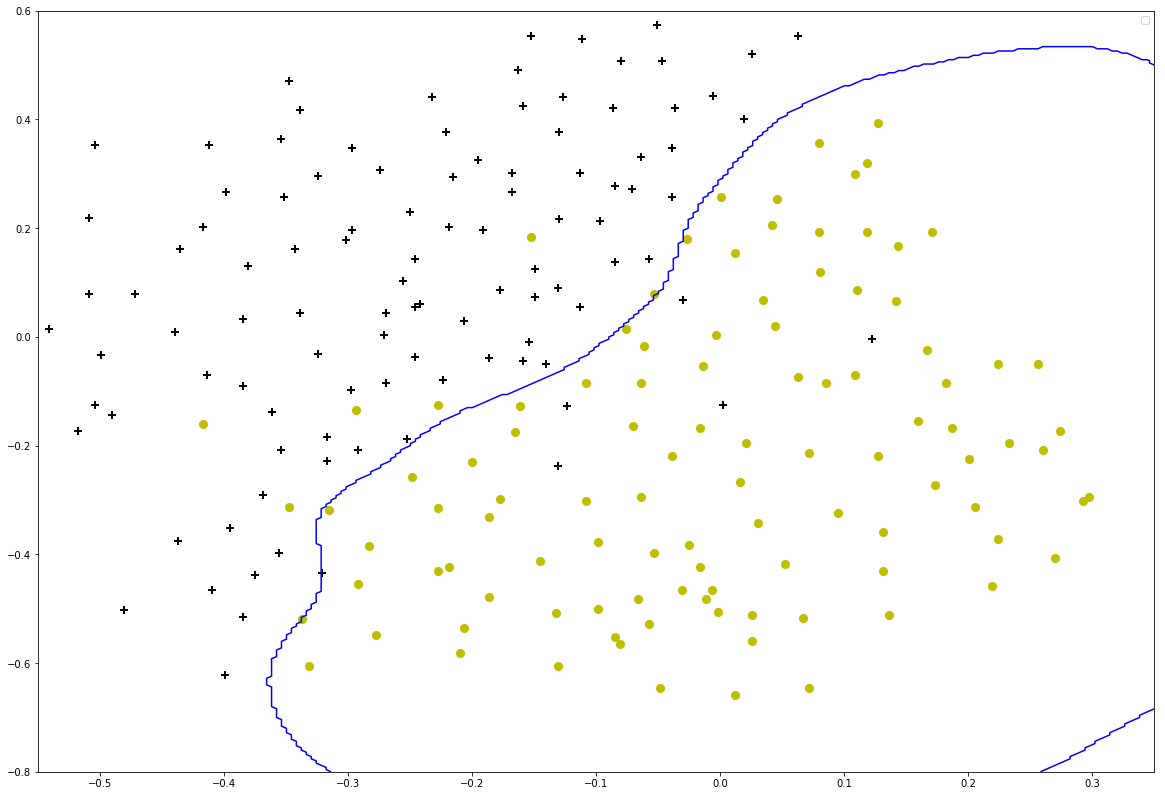

In [53]:
clfgmax = svm.SVC(kernel = 'rbf', gamma = 1/(2*(sigma_max)**2), C = c_max, decision_function_shape = 'ovr')
clfgmax.fit(data3['X'], data3['y'].ravel())

plot_data(data3['X'], data3['y'], '', '', '', '', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = clfgmax.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], linewdith = 0.5, colors = 'b')

**Observation**: As seen above, the model is quite good at separating the data and seems to generalize well in the presence of outliers. Interestingly, the optimal value of C was found to be 1.

## Spam Classification

#### Import data

In [54]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

In [55]:
c = 0.1

clf_spam = svm.SVC(kernel = 'linear', C = c, decision_function_shape = 'ovr')
clf_spam.fit(spam_train['X'], spam_train['y'].ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(spam_test['Xtest'], spam_test['ytest'].ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.825
Test accuracy = 98.9
